In [1]:
from numpy import *
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## <font color='darkgreen'> Importing datasets : </font>

##### Car Price Prediction Multiple Linear Regression

Source : https://www.kaggle.com/hellbuoy/car-price-prediction
        
##### Startup - Multiple Linear Regression

Source : https://www.kaggle.com/karthickveerakumar/startup-logistic-regression

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')
data = data[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio','stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]
data = data.rename(columns={"price": "Target"})
data = data.head(100)

In [3]:
data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Target
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# data = pd.read_csv('50_Startups.csv')
# data = data[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']]

## <font color='darkgreen'> Feature Selection Module </font>
<font color='darkred'> This module eliminates all the independant variables that are not related to the dependant variables by a linear relationship
and removes multicollinearity as well

It defines the functions for calculating covariance, standard deviation, correlation coefficient, 
partial correlation coefficient and the correlation matrix
    
</font>

In [5]:
def feature_selection_module(data):
    #For now, assuming the dependent variable column name is 'Target' by default
    features = data.drop(['Target'], axis=1)
    y = data['Target']
    #features = data[data.columns[:-1]]
    #y = data[data.columns[-1]]
    features= features.reset_index()
    y = y.reset_index()
    data_rearranged = pd.merge(y,features,on = 'index', how = 'left')
    data_rearranged = data_rearranged.drop(['index'], axis=1)
    n1 = data.shape[0]
    n2 = data.shape[1]
    significant_r = 1.96/(sqrt(n1))
    data_temp = data 
        
    def covariance(X, Y,data):
        mean_x = X.mean()
        mean_y = Y.mean()
        data_temp = data.copy(deep=True)
        data_temp['(xi-xbar)'] = X - mean_x
        data_temp['(yi-ybar)'] = Y - mean_y
        data_temp['(xi-xbar)(yi-ybar)'] = data_temp['(xi-xbar)']*data_temp['(yi-ybar)']
        covariance = (data_temp['(xi-xbar)(yi-ybar)'].sum())/(n1-1)
        return covariance
    
    def standard_deviation(X,data):
        mean_x = X.mean()
        data_temp = data.copy(deep=True)
        data_temp['(xi-xbar)'] = X - mean_x
        data_temp['(xi-xbar)**2'] = data_temp['(xi-xbar)']*data_temp['(xi-xbar)']
        variance = (data_temp['(xi-xbar)**2'].sum())/(n1-1)
        standard_deviation = sqrt(variance)
        return standard_deviation 
    
    def correlation_coefficient(cov, std_dev1, std_dev2):
        corr_coeff = cov/(std_dev1*std_dev2)
        return corr_coeff

    def partial_correlation_coefficient(Y, X1, X2, data):
        cov_y_x1 = covariance(Y, X1, data)
        cov_y_x2 = covariance(Y, X2, data)
        s_y = standard_deviation(Y, data)
        s_x1 = standard_deviation(X1, data)
        s_x2 = standard_deviation(X2, data)
        r_y_x1 = cov_y_x1/(s_y*s_x1)
        r_y_x2 = cov_y_x2/(s_y*s_x2)
        numerator = r_y_x1 - r_y_x2
        denominator = sqrt((1-r_y_x1**2)*(1-r_y_x2**2))
        partial_corr_coeff = numerator/denominator
        return partial_corr_coeff
    
    corr_matrix = []
    
    def correlation_matrix(data):
        for i in range(n2):
            corr_matrix.append([])
            for j in range(n2):
                cov = covariance(data[data.columns[i]], data[data.columns[j]],data)
                std_dev1 = standard_deviation(data[data.columns[i]],data)
                std_dev2 = standard_deviation(data[data.columns[j]],data)
                corr_matrix[i].append(correlation_coefficient(cov, std_dev1, std_dev2))
        return corr_matrix
    
    def multi_collinearity_module(data, significant_r):
        corr_matrix = correlation_matrix(data)
        
        insignificant_features_index_list = []
        
        ### Removing insignficant features (for which r of y and x(i) < r_significant)
        corr_mat = np.asarray(corr_matrix)
        
        for i in range(corr_mat.shape[1]):
            if abs(corr_mat[0][i]) < significant_r:
                insignificant_features_index_list.append(i)
            else:
                continue
                
        ### Removing multi-collinearity
        
        for p in range(1, corr_mat.shape[0]):
            for q in range(p+1, corr_mat.shape[1], 1):
                print('\n p = ',p,',q = ', q)
                print('corr_matrix[p][q]: ',corr_matrix[p][q])
                print('significant_r: ',significant_r)
                if abs(corr_matrix[p][q]) > significant_r :
                    partial_correlation_coefficient1 = partial_correlation_coefficient(data[data.columns[0]],data[data.columns[p]],data[data.columns[q]],data) 
                    partial_correlation_coefficient2 = partial_correlation_coefficient(data[data.columns[0]],data[data.columns[q]],data[data.columns[p]],data)
                    print('partial_correlation_coefficient1: ',partial_correlation_coefficient1)
                    print('partial_correlation_coefficient2: ',partial_correlation_coefficient2)
                    if abs(partial_correlation_coefficient1) > significant_r:
                        if abs(partial_correlation_coefficient2) > significant_r:
                            if abs(partial_correlation_coefficient1) > abs(partial_correlation_coefficient2):
                                insignificant_features_index_list.append(q)
                                print('insignificant_features_index_list:', insignificant_features_index_list)
                            else :
                                insignificant_features_index_list.append(p)
                                print('insignificant_features_index_list:', insignificant_features_index_list)
                        else :
                            insignificant_features_index_list.append(q)
                            print('insignificant_features_index_list:', insignificant_features_index_list)
                    else :
                        if abs(partial_correlation_coefficient2) > significant_r:
                            insignificant_features_index_list.append(p)
                            print('insignificant_features_index_list:', insignificant_features_index_list)
                        else :
                            insignificant_features_index_list.append(p)
                            insignificant_features_index_list.append(q)
                            print('insignificant_features_index_list:', insignificant_features_index_list)
                else :
                    continue
                
        return insignificant_features_index_list, corr_matrix
    
    features_list = []
    for i in range(1, data_rearranged.shape[1]):
        features_list.append(i)
    
    insignificant_features_index_list, correlation_matrix = multi_collinearity_module(data_rearranged, significant_r)
    unique_insignificant_features_index_list = (unique(insignificant_features_index_list)).tolist()
    significant_features_index_set = set(features_list) - set(unique_insignificant_features_index_list)
    significant_features_index_list = list(significant_features_index_set)
    cols = data_rearranged.columns.values.tolist()
    significant_feature_names = [cols[i] for i in significant_features_index_list] 

    final_cols_subset = significant_feature_names.copy()
    final_cols_subset.append(cols[0])
    
    return significant_feature_names, final_cols_subset, correlation_matrix, data_rearranged
            
        

#### <font color='darkgreen'> Printing the list of significant variables after feature selection : </font>

In [6]:
imp_variables, final_cols_subset, correlation_matrix, data_rearranged = feature_selection_module(data)


 p =  1 ,q =  2
corr_matrix[p][q]:  0.8933432058036216
significant_r:  0.196
partial_correlation_coefficient1:  -0.07462276275297836
partial_correlation_coefficient2:  0.07462276275297836
insignificant_features_index_list: [8, 9, 1, 2]

 p =  1 ,q =  3
corr_matrix[p][q]:  0.8461952200038064
significant_r:  0.196
partial_correlation_coefficient1:  -0.06126845798583932
partial_correlation_coefficient2:  0.06126845798583932
insignificant_features_index_list: [8, 9, 1, 2, 1, 3]

 p =  1 ,q =  4
corr_matrix[p][q]:  0.5665411390308542
significant_r:  0.196
partial_correlation_coefficient1:  1.0021950940161786
partial_correlation_coefficient2:  -1.0021950940161786
insignificant_features_index_list: [8, 9, 1, 2, 1, 3, 1]

 p =  1 ,q =  5
corr_matrix[p][q]:  0.8420561736144638
significant_r:  0.196
partial_correlation_coefficient1:  -0.5161473593452646
partial_correlation_coefficient2:  0.5161473593452646
insignificant_features_index_list: [8, 9, 1, 2, 1, 3, 1, 1]

 p =  1 ,q =  6
corr_matrix[

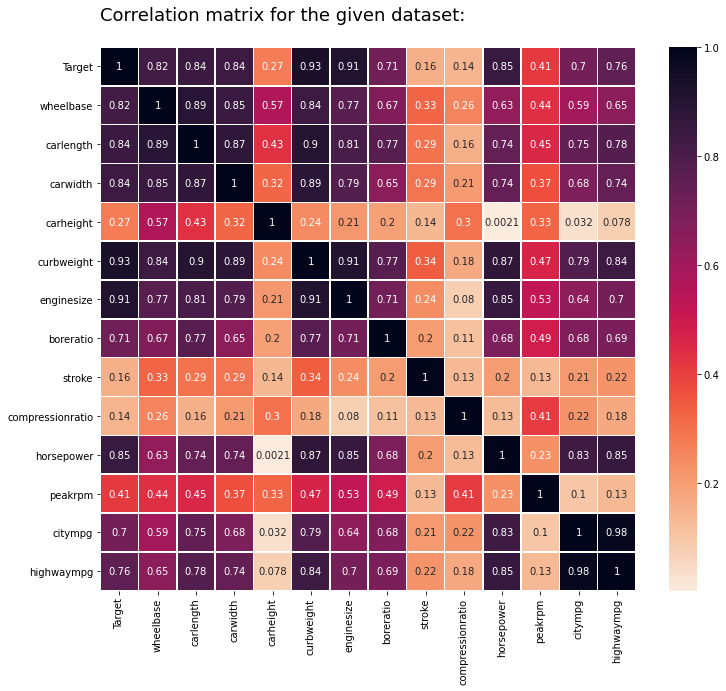

In [7]:
correlation_matrix_absolute = np.absolute(correlation_matrix)
cmap = sns.cm.rocket_r
col_names = data_rearranged.columns
fig = plt.subplots(figsize=(12, 10))
title = 'Correlation matrix for the given dataset: \n'
plt.title(title, loc='left', fontsize=18)
ax = sns.heatmap(correlation_matrix_absolute, annot=True, xticklabels=col_names, yticklabels=col_names,linewidth=0.5,cmap = cmap)
plt.show()

In [8]:
print('Significant variables : ', imp_variables)

Significant variables :  ['peakrpm']


In [9]:
data_subset = data[final_cols_subset]
data_subset.head()

,peakrpm,Target
0,5000,13495.0
1,5000,16500.0
2,5000,16500.0
3,5500,13950.0
4,5500,17450.0
